In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("../data/heart_disease_cleaned.csv")

X = df.drop(columns=["target", "target_bin"])
y = df["target_bin"]

print("Shape:", X.shape, y.shape)

Shape: (303, 20) (303,)


In [4]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

feat_importances

thalach        0.148166
oldpeak        0.113265
thal_7.0       0.097233
cp_4.0         0.096145
age            0.091400
chol           0.079924
trestbps       0.075685
exang_1.0      0.057223
slope_2.0      0.040865
sex_1.0        0.038605
ca_1.0         0.035661
cp_3.0         0.026595
ca_2.0         0.025617
restecg_2.0    0.018697
cp_2.0         0.014479
ca_3.0         0.013951
fbs_1.0        0.011249
thal_6.0       0.008712
slope_3.0      0.005786
restecg_1.0    0.000743
dtype: float64

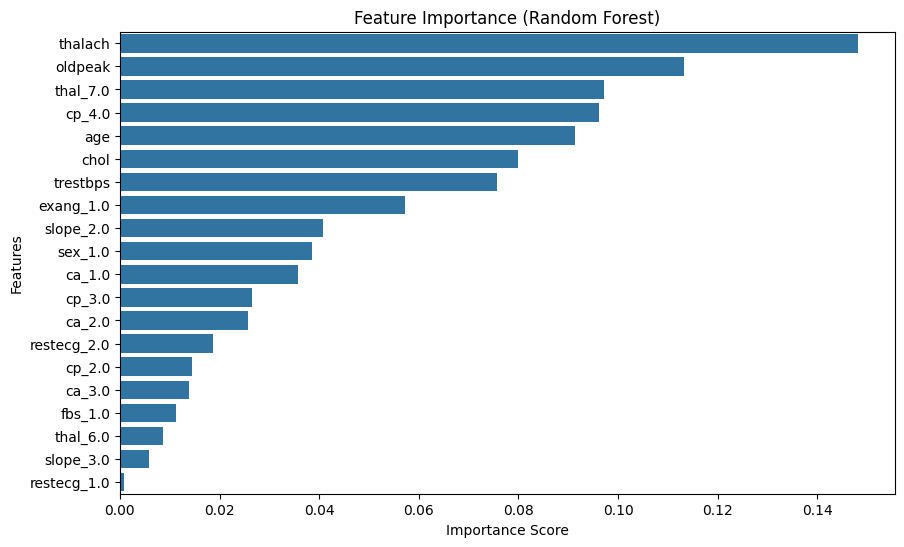

In [5]:
#  Plot top features by importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [6]:
# Recursive Feature Elimination (RFE) with Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")

rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X, y)

# Get selected features
rfe_selected = pd.Series(rfe.support_, index=X.columns)
selected_features = rfe_selected[rfe_selected == True].index.tolist()

print("Selected features by RFE:", selected_features)

Selected features by RFE: ['oldpeak', 'sex_1.0', 'cp_3.0', 'cp_4.0', 'exang_1.0', 'slope_2.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_7.0']


In [7]:
rfe_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
rfe_ranking

sex_1.0         1
cp_3.0          1
oldpeak         1
cp_4.0          1
exang_1.0       1
slope_2.0       1
ca_1.0          1
ca_2.0          1
ca_3.0          1
thal_7.0        1
thalach         2
restecg_2.0     3
trestbps        4
fbs_1.0         5
chol            6
restecg_1.0     7
slope_3.0       8
age             9
thal_6.0       10
cp_2.0         11
dtype: int64

In [8]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Scale features to non-negative range (0–1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi2 to select top 10 features
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_scaled, y)

chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False)
chi2_scores

thal_7.0       42.958360
cp_4.0         42.410097
exang_1.0      38.052613
cp_3.0         21.551109
slope_2.0      20.624160
ca_2.0         19.509795
cp_2.0         15.646367
ca_1.0         12.461167
ca_3.0         12.330323
oldpeak        11.382669
sex_1.0         7.432845
restecg_2.0     3.987845
thal_6.0        3.133971
thalach         2.670638
restecg_1.0     1.366567
slope_3.0       1.073891
age             1.005896
trestbps        0.532647
fbs_1.0         0.164669
chol            0.111079
dtype: float64

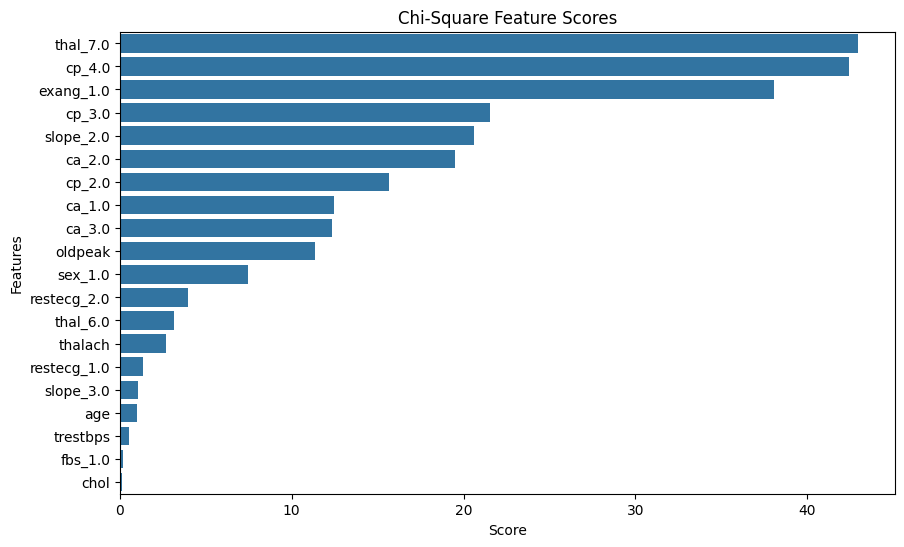

In [ ]:
# Plot Chi-Square feature scores
plt.figure(figsize=(10,6))
sns.barplot(x=chi2_scores.values, y=chi2_scores.index)
plt.title("Chi-Square Feature Scores")
plt.xlabel("Score")
plt.ylabel("Features")
plt.show()


In [10]:
rf_top10 = feat_importances.head(10).index.tolist()

# Top 10 features from Chi-Square
chi2_top10 = chi2_scores.head(10).index.tolist()

# RFE-selected features (already chosen as 10)
rfe_top = selected_features

print("Random Forest Top 10:", rf_top10)
print("Chi-Square Top 10:", chi2_top10)
print("RFE Selected:", rfe_top)

# Intersection of features (common important ones)
final_features = list(set(rf_top10) | set(chi2_top10) | set(rfe_top))
print("\nFinal selected features:", final_features)

Random Forest Top 10: ['thalach', 'oldpeak', 'thal_7.0', 'cp_4.0', 'age', 'chol', 'trestbps', 'exang_1.0', 'slope_2.0', 'sex_1.0']
Chi-Square Top 10: ['thal_7.0', 'cp_4.0', 'exang_1.0', 'cp_3.0', 'slope_2.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'ca_3.0', 'oldpeak']
RFE Selected: ['oldpeak', 'sex_1.0', 'cp_3.0', 'cp_4.0', 'exang_1.0', 'slope_2.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_7.0']

Final selected features: ['chol', 'cp_3.0', 'ca_1.0', 'exang_1.0', 'oldpeak', 'age', 'slope_2.0', 'ca_2.0', 'cp_4.0', 'trestbps', 'thalach', 'sex_1.0', 'cp_2.0', 'thal_7.0', 'ca_3.0']
